## "Harnessing NLP for Disaster Tweet Classification: Unraveling Insights from Social Media Language"
"Exploring Natural Language Processing (NLP) with Disaster Tweets involves leveraging advanced linguistic and machine learning techniques to analyze and categorize tweets related to disasters. This project aims to develop models that can effectively distinguish between tweets discussing real disasters and those that are not. Through the application of text analysis, sentiment classification, and deep learning, we seek to enhance our understanding of how language is used in the context of emergencies. The ultimate goal is to contribute to more accurate and timely identification of disaster-related content on social media, aiding in faster response and improved situational awareness."

# steps :
1. Data cleaning 
2. Eda 
3. Text preprocessing
4. model building 
5. evaluation 
6. improvement

# Dateset :
1. train.csv - the training set

# Columns
1. id - a unique identifier for each tweet
2. text - the text of the tweet
3. location - the location the tweet was sent from (may be blank)
4. keyword - a particular keyword from the tweet (may be blank)
5. target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## 1. basic eda and data cleaning

In [4]:
train_df.sample(5)

,id,keyword,location,text,target
2863,4114,drought,Canada,CANADA BC DROUGHT: Okanagan region issued Leve...,1
4149,5898,harm,Kansas City,@dinallyhot Love what you picked! We're playin...,0
1797,2579,crash,"Melbourne, Australia",@DestinyTheGame @Bungie @PlayStation Getting k...,0
5068,7226,natural%20disaster,on to the next adventure,Of course the one day I have to dress professi...,1
3412,4883,explode,"Oklahoma City, OK",my brain id about to explode lmao,0


In [5]:
train_df.shape

(7613, 5)

In [6]:
train_df.drop(columns=['id' , 'keyword' , 'location'], inplace=True)

In [7]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# null values 
train_df.isnull().any()

text      False
target    False
dtype: bool

In [9]:
# duplicates 
train_df.duplicated().sum()

92

In [10]:
train_df.drop_duplicates(inplace=True)

In [11]:
train_df.shape

(7521, 2)

## 2. eda

In [12]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [14]:
df = train_df

In [15]:
df['target'].value_counts()

0    4315
1    3206
Name: target, dtype: int64

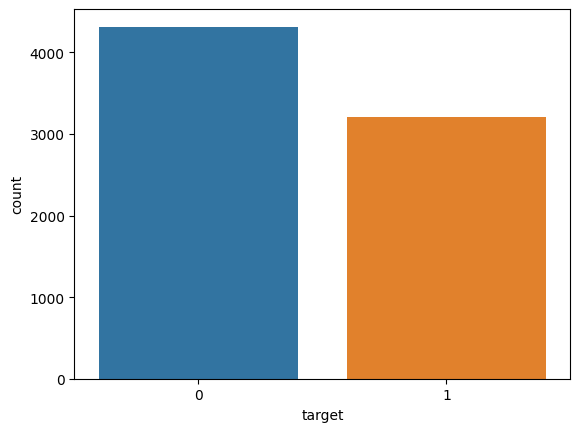

In [16]:
sns.countplot(x='target' , data = df)
plt.show()

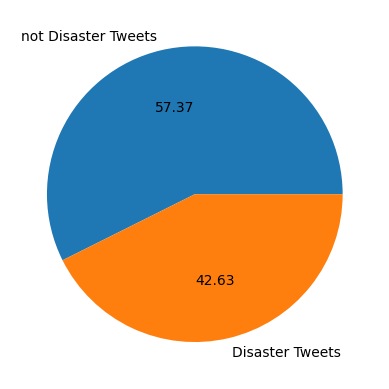

In [17]:
plt.pie(df['target'].value_counts() ,labels=['not Disaster Tweets' , 'Disaster Tweets'] , autopct='%0.2f')
plt.show()

note : data is Imbalanced

In [18]:
import nltk

In [19]:
df['text_len'] = df['text'].apply(len)


In [20]:
df.sample(5)

,text,target,text_len
3209,#Nursing alert: Emergency Department Psychiatr...,1,137
6529,#Autoinsurance industry clueless on #driverles...,0,100
2628,#ThingsIhate \nWatching someone you care about...,0,108
1848,This guy idk just made me his woman crush ?? f...,0,62
6315,Lately I been stressing make me wanna put a fu...,0,70


In [21]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [22]:
df.sample(5)

,text,target,text_len,num_words
1319,@Rubi_ How many stacks of burning did it apply?,0,47,11
5063,natural disaster ÛÒ News Stories About natura...,1,97,16
5715,@AndyGilder Channel 5 have been doing the same...,0,128,26
476,@blazerfan not everyone can see ignoranceshe i...,0,133,25
5261,California: Spring Oil Spill Estimate Grows: D...,1,136,23


In [23]:
df['num_santance'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
df.sample(5)

,text,target,text_len,num_words,num_santance
7431,National free root beer float day is tomorrow ...,0,134,30,3
2351,Thinking about getting a demo car with a frien...,0,91,16,1
4841,#DebateQuestionsWeWantToHear Why does #Saudi a...,1,110,20,2
4756,Don't blink ?? won't see the Lightning take th...,1,75,18,5
1116,http://t.co/wMNOnHxEIr 'Nagasaki has to be for...,1,105,20,2


In [25]:
df.describe()

,target,text_len,num_words,num_santance
count,7521.000000,7521.000000,7521.000000,7521.000000
mean,0.426273,100.880734,18.893498,1.560032
std,0.494567,33.812307,6.883044,0.968874
min,0.000000,7.000000,1.000000,1.000000
25%,0.000000,77.000000,14.000000,1.000000
50%,0.000000,107.000000,19.000000,1.000000
75%,1.000000,133.000000,24.000000,2.000000
max,1.000000,157.000000,72.000000,22.000000


In [26]:
# not Disaster Tweet
df[df['target']==0].describe()

,target,text_len,num_words,num_santance
count,4315.0,4315.000000,4315.000000,4315.000000
mean,0.0,95.603708,18.632908,1.666049
std,0.0,35.924812,7.444845,1.067254
min,0.0,7.000000,1.000000,1.000000
25%,0.0,68.000000,13.000000,1.000000
50%,0.0,101.000000,19.000000,1.000000
75%,0.0,130.000000,24.000000,2.000000
max,0.0,157.000000,72.000000,22.000000


In [27]:
# Disaster Tweet
df[df['target']==1].describe()

,target,text_len,num_words,num_santance
count,3206.0,3206.000000,3206.000000,3206.000000
mean,1.0,107.983157,19.244230,1.417342
std,0.0,29.281074,6.028424,0.796168
min,1.0,14.000000,2.000000,1.000000
25%,1.0,88.000000,15.000000,1.000000
50%,1.0,114.000000,20.000000,1.000000
75%,1.0,135.000000,24.000000,2.000000
max,1.0,151.000000,39.000000,8.000000


note : mean of  Disaster Tweet > mean of not  Disaster Tweet in case of text_len

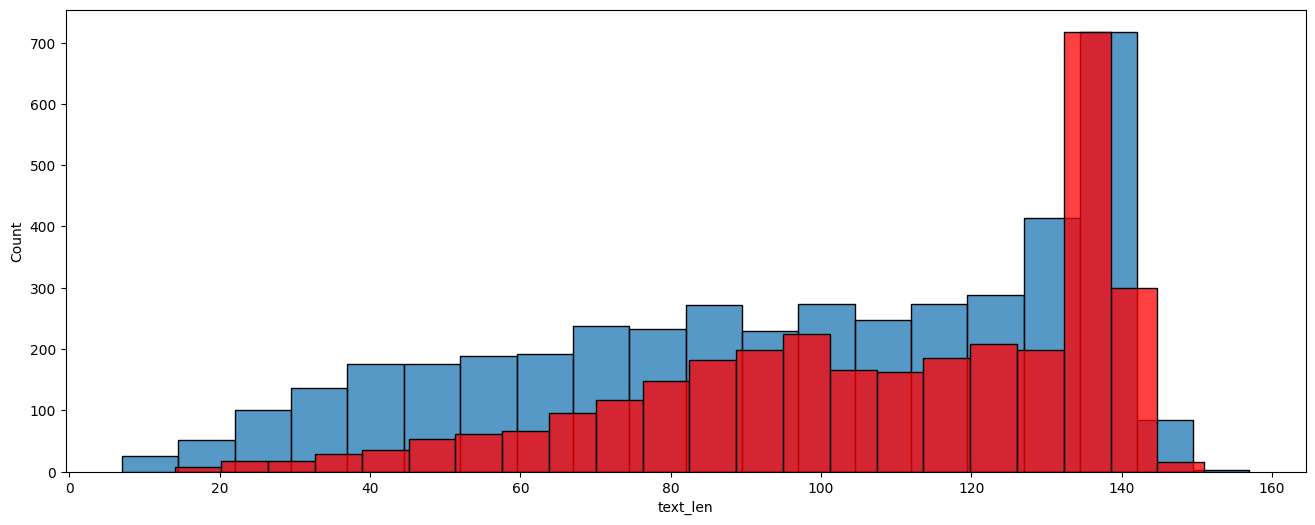

In [28]:
plt.figure(figsize=(16,6))
sns.histplot(df[df['target'] == 0]['text_len'])
sns.histplot(df[df['target'] == 1]['text_len'] , color='red')
plt.show()

note : lenght of Disaster Tweet < lenght of non Disaster Tweet

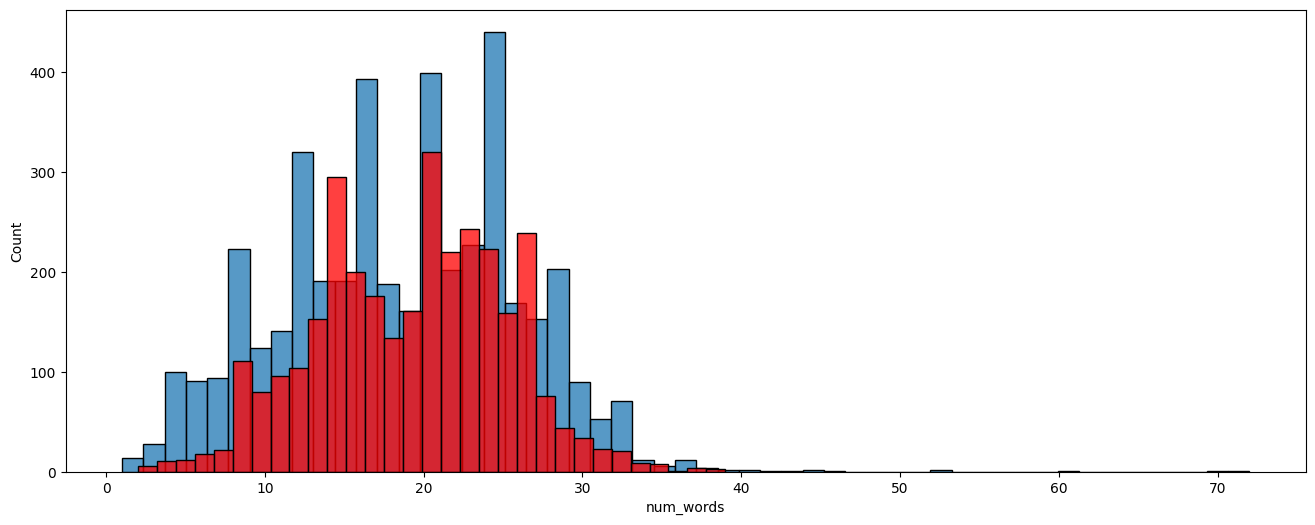

In [29]:
plt.figure(figsize=(16,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color='red')
plt.show()

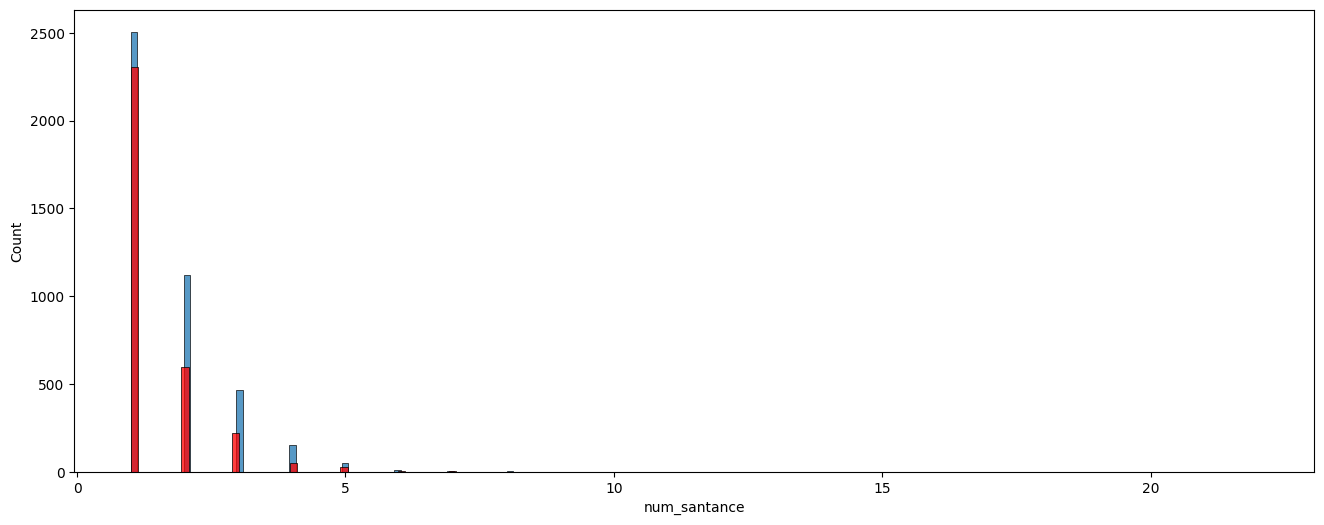

In [30]:
plt.figure(figsize=(16,6))
sns.histplot(df[df['target'] == 0]['num_santance'])
sns.histplot(df[df['target'] == 1]['num_santance'] , color='red')
plt.show()

note : all above numerical values in case of Disaster Tweet < non Disaster Tweet

-- here we see impotance of visulization beacuse in case of mean all numerical values > in case of  Disaster Tweet but that could be effect of outliers 

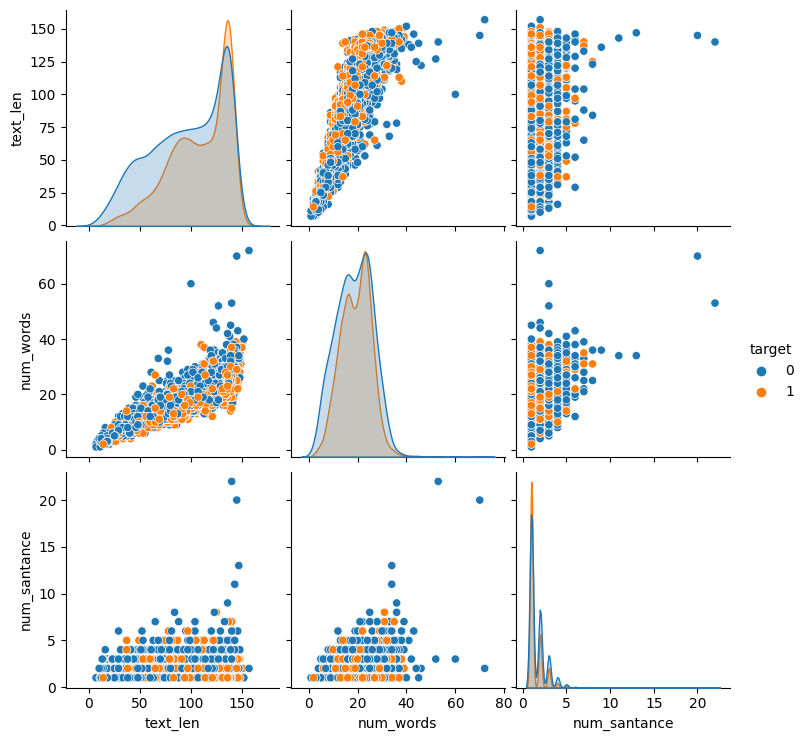

In [31]:
sns.pairplot(df, hue='target')

note : we have outliers in data

C:\Users\91865\AppData\Local\Temp\ipykernel_5328\735383759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,annot=True)


<AxesSubplot: >

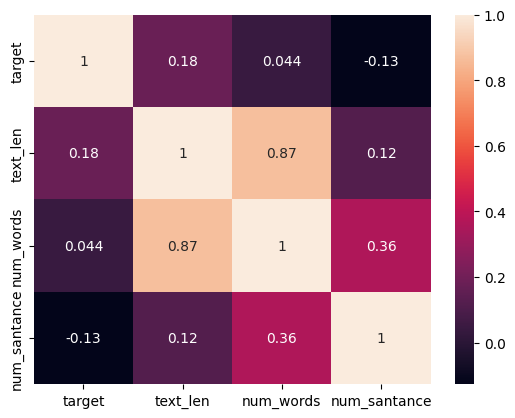

In [32]:
sns.heatmap(df.corr() ,annot=True)

note : here we can see muticollinearity in input column we take any one for model which is text_len due to high correlation with target

## 3. Text preprocessing
1. lower case 
2. tokenization
3. removel of special chr 
4. removal of stop words and punctuation 
5. stemming

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def text_trformation(text) :
    # step 1 
    text = text.lower()
    # step 2 
    words = nltk.word_tokenize(text)
    # step 3 
    filtered_words = [i for i in words if i.isalnum()]
    # step 4 
    filtered_words = [i for i in filtered_words if i not in stopwords.words('english') and i not in string.punctuation]
    # step 5 
    stem_words = [ps.stem(i) for i in filtered_words]
    return ' '.join(stem_words)

In [35]:
text_trformation('Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all')

'deed reason earthquak may allah forgiv us'

In [36]:
df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [37]:
df['transformed_text'] = df['text'].apply(text_trformation)

In [38]:
df.head()

,text,target,text_len,num_words,num_santance,transformed_text
0,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,1,38,8,2,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,133,24,2,resid ask place notifi offic evacu shelter pla...
3,"13,000 people receive #wildfires evacuation or...",1,65,9,1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,got sent photo rubi alaska smoke wildfir pour ...


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [40]:
Disaster_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =' '))

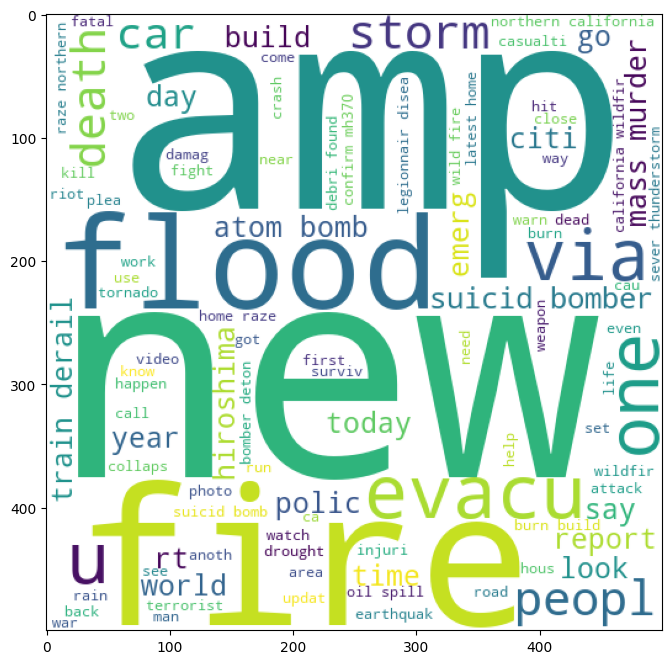

In [41]:
plt.figure(figsize=(16,8))
plt.imshow(Disaster_wc)

In [42]:
non_Disaster_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =' '))

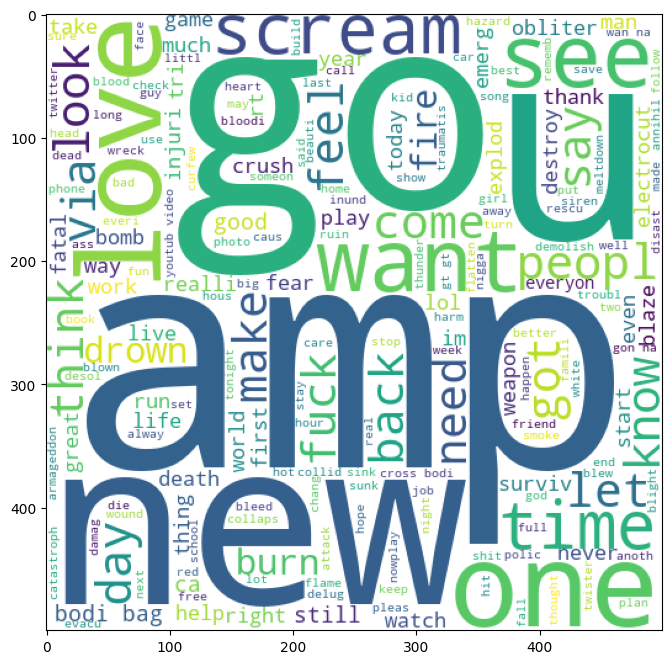

In [43]:
plt.figure(figsize=(16,8))
plt.imshow(non_Disaster_wc)

In [44]:
df.head()

,text,target,text_len,num_words,num_santance,transformed_text
0,Our Deeds are the Reason of this #earthquake M...,1,69,14,1,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,1,38,8,2,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,133,24,2,resid ask place notifi offic evacu shelter pla...
3,"13,000 people receive #wildfires evacuation or...",1,65,9,1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1,got sent photo rubi alaska smoke wildfir pour ...


In [45]:
list_dtext = []
for i in df[df['target'] == 1 ]['transformed_text'].tolist() :
    for j in i.split() :
        list_dtext.append(j)       

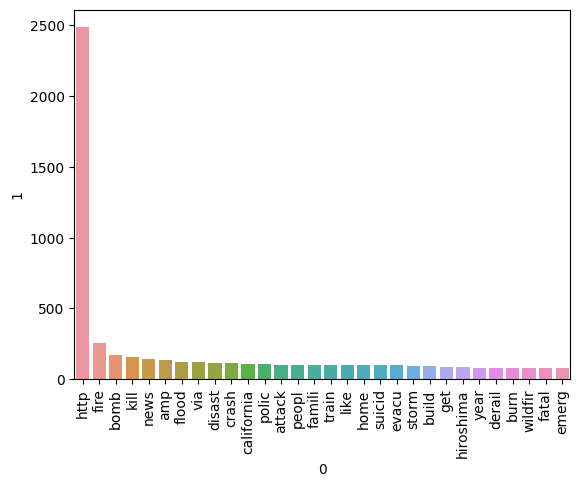

In [46]:
from collections import Counter
dict_dtext = Counter(list_dtext)
s = pd.DataFrame(dict_dtext.most_common(30))
sns.barplot(x =0 ,y = 1 , data = s)
plt.xticks(rotation = 'vertical')
plt.show()

In [47]:
list_dtext = []
for i in df[df['target'] == 0 ]['transformed_text'].tolist() :
    for j in i.split() :
        list_dtext.append(j)    

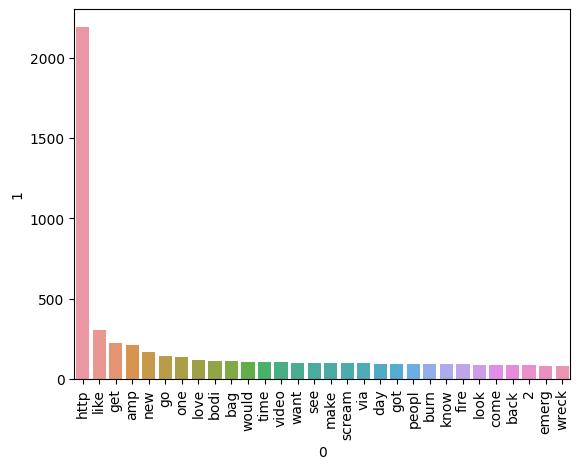

In [48]:
from collections import Counter
dict_dtext = Counter(list_dtext)
s = pd.DataFrame(dict_dtext.most_common(30))
sns.barplot(x =0 ,y = 1 , data = s)
plt.xticks(rotation = 'vertical')
plt.show()

## 4. model building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [50]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [51]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
X.shape

(7521, 13022)

In [53]:
y = df['target'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [56]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , f1_score

In [57]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.6139534883720931
[[365 452]
 [129 559]]
0.552917903066271
0.6580341377280754


note : model not performing well 

In [59]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.7946843853820598
[[694 123]
 [186 502]]
0.8032
0.7646610814927646


note : we get 0.8032 of precision_score which is quite good

In [60]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.7900332225913621
[[737  80]
 [236 452]]
0.849624060150376
0.7409836065573769


note : we get 0.8496 of precision_score which is quite good

In [61]:
# using TfidfVectorizer 
X1 = tf.fit_transform(df['transformed_text']).toarray()

In [62]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
X_train , X_test  , y_train , y_test = train_test_split(X1 , y , test_size=0.2 , random_state=2)

In [64]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.6093023255813953
[[377 440]
 [148 540]]
0.5510204081632653
0.6474820143884891


In [65]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.7820598006644518
[[745  72]
 [256 432]]
0.8571428571428571
0.7248322147651007


note : this model giving max precision_score of 0.8571

In [66]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.7900332225913621
[[737  80]
 [236 452]]
0.849624060150376
0.7409836065573769


NOTE : we go with tf - mnd if we go for precision 
and if we good with f1_score then we go with cv - mnb

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [78]:
cv = CountVectorizer()

In [79]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [80]:
X.shape

(7521, 13022)

In [81]:
y.shape

(7521,)

In [82]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7946843853820598
[[694 123]
 [186 502]]
0.8032
0.7646610814927646


In [83]:
# voting.fit(X_train,y_train)

In [84]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("f1_score",f1_score(y_test,y_pred))

# result
multinomial naive bayes giving best f1_score of 0.7646

In [85]:
import pickle
pickle.dump(cv , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))